In [1]:
import pandas as pd
from dateutil.parser import parse
import matplotlib.pylab as plt

In [2]:
# Import as Dataframe
df = pd.read_csv('train.csv', parse_dates=['date'], index_col='date')
df.head()

,aedvolume
date,
2016-01-01,13778988
2016-02-01,16747480
2016-03-01,14175517
2016-04-01,20968656
2016-05-01,18157129


In [15]:
df.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=1096, freq=None)

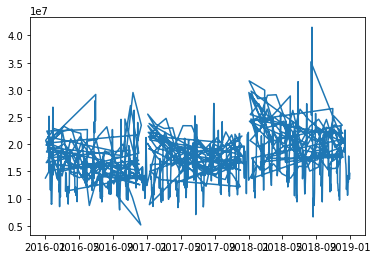

In [16]:
#Simple plotting
plt.plot(df)


In [17]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='date', ylabel='aedvolume', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

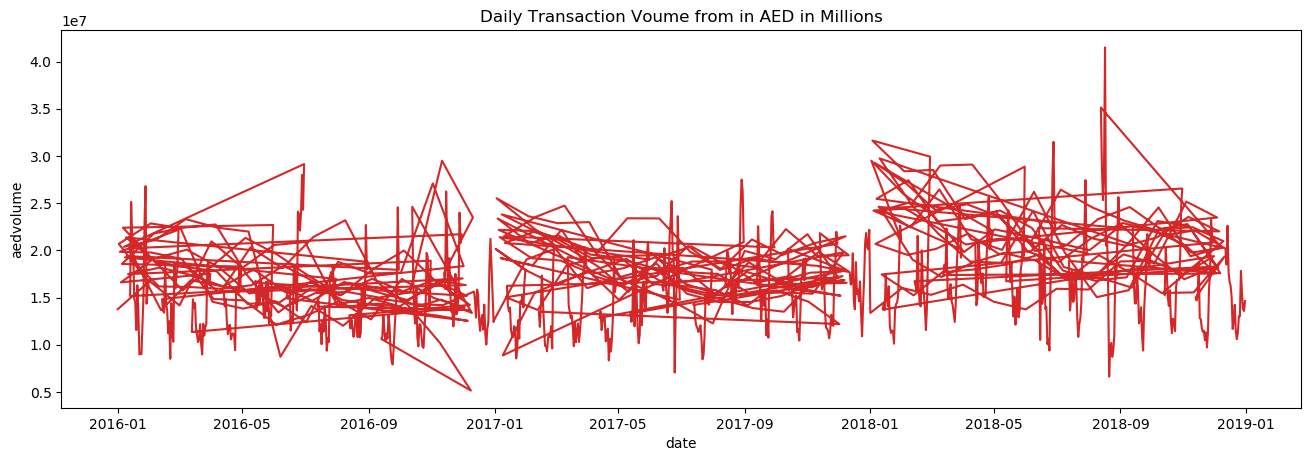

In [19]:
plot_df(df, x=df.index, y=df.aedvolume, title='Daily Transaction Voume from in AED in Millions')

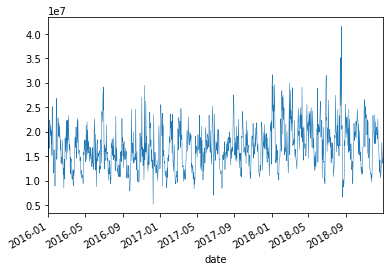

In [20]:
#using pandas plot
df['aedvolume'].plot(linewidth=0.5);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F35E96BC08>],
      dtype=object)

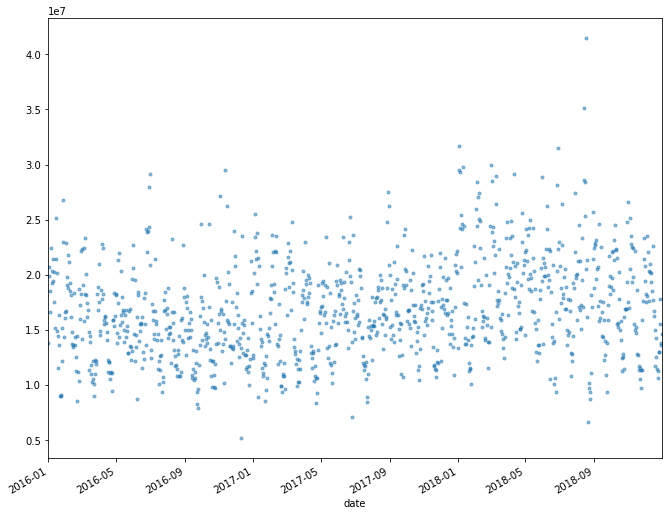

In [22]:
#styling the plot as dot plot
df['aedvolume'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

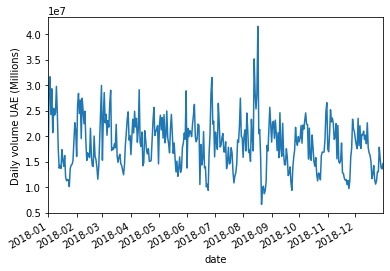

In [31]:
ax = df.loc['2018', 'aedvolume'].plot()
ax.set_ylabel('Daily volume UAE (Millions)');

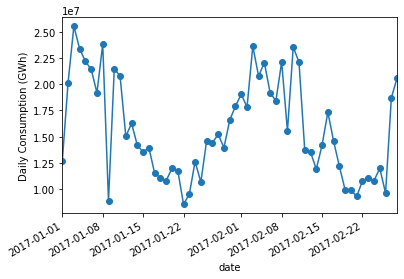

In [37]:
ax = df.loc['2017-01':'2017-02', 'aedvolume'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

In [43]:
import matplotlib.dates as mdates

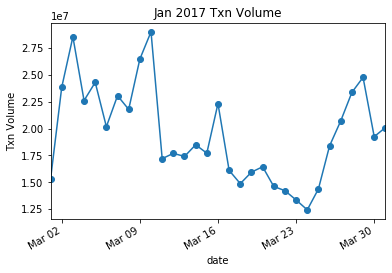

In [58]:
fig, ax = plt.subplots()
ax = df.loc['2018-03', 'aedvolume'].plot(marker='o', linestyle='-')
ax.set_ylabel('Txn Volume')
ax.set_title('Jan 2017 Txn Volume')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.FRIDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));


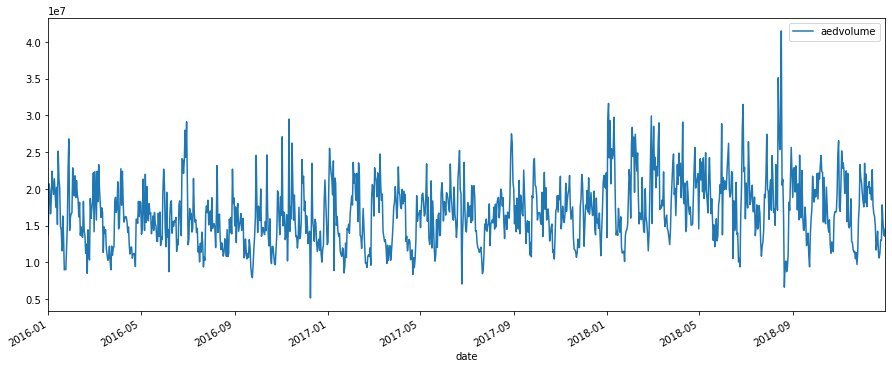

In [64]:
df.plot(figsize=(15, 6))
plt.show()



In [66]:
#decomposing the data https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
print(df)

            aedvolume
date                 
2016-01-01   13778988
2016-02-01   16747480
2016-03-01   14175517
2016-04-01   20968656
2016-05-01   18157129
...               ...
2018-12-27   17831056
2018-12-28   15540769
2018-12-29   13784600
2018-12-30   13584611
2018-12-31   14632817

[1096 rows x 1 columns]


date
2016-01-01    1.722851e+07
2016-02-01    1.637058e+07
2016-03-01    1.523642e+07
2016-04-01    1.531367e+07
2016-05-01    1.617679e+07
2016-06-01    1.752988e+07
2016-07-01    1.472065e+07
2016-08-01    1.469121e+07
2016-09-01    1.367195e+07
2016-10-01    1.473206e+07
2016-11-01    1.710944e+07
2016-12-01    1.436497e+07
2017-01-01    1.560340e+07
2017-02-01    1.586815e+07
2017-03-01    1.645771e+07
2017-04-01    1.516087e+07
2017-05-01    1.620271e+07
2017-06-01    1.786339e+07
2017-07-01    1.472945e+07
2017-08-01    1.765517e+07
2017-09-01    1.712253e+07
2017-10-01    1.624904e+07
2017-11-01    1.631099e+07
2017-12-01    1.718402e+07
2018-01-01    1.857717e+07
2018-02-01    1.981118e+07
2018-03-01    1.950676e+07
2018-04-01    1.983729e+07
2018-05-01    1.893718e+07
2018-06-01    1.906942e+07
2018-07-01    1.779842e+07
2018-08-01    1.956523e+07
2018-09-01    1.753422e+07
2018-10-01    1.819240e+07
2018-11-01    1.713983e+07
2018-12-01    1.669792e+07
Freq: MS, Name: aedvolu

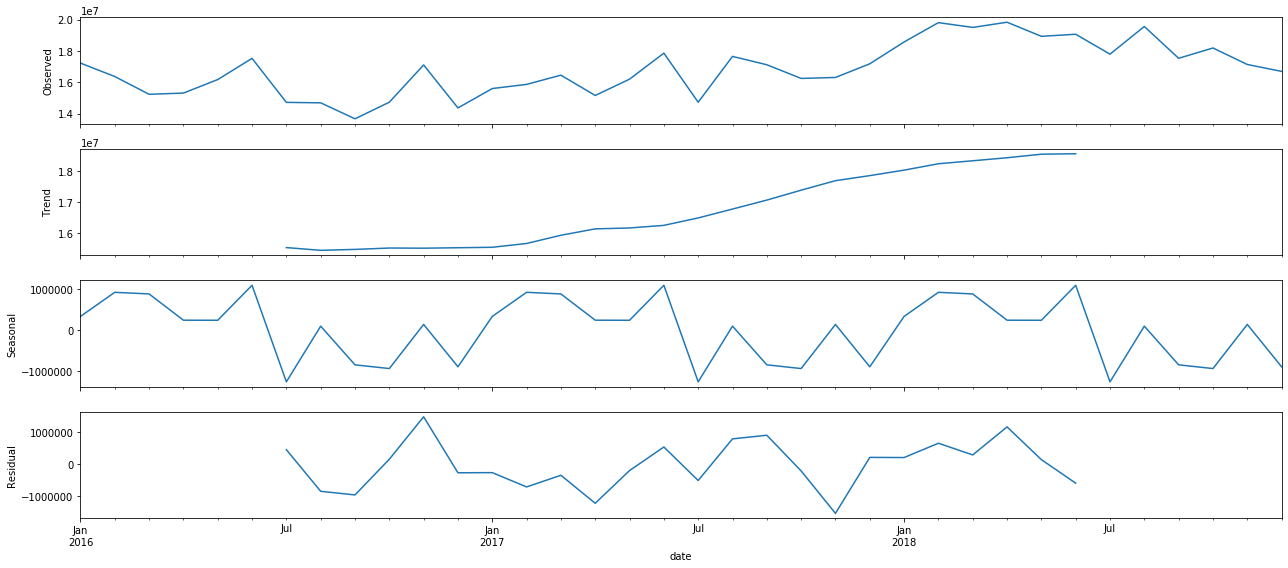

In [69]:
y = df['aedvolume'].resample('MS').mean()
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [73]:
# trend, seasonality and noise denoted as 
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
print(pdq)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [78]:
#parameter selection for ARIMA
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1266.365909506997
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:742.3888399073262
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:761.0526911616085
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:392.66131324526646
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1209.227559724941
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:700.6877984188245
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:849.3866680550572
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:386.500863933519
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1062.4694271298713
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:696.9496338650936
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:714.6253538837952
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:344.624524718243
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1023.9451783164334
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:661.641088299577
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:712.694367216399
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:345.7726710183621
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1094.8760106558573
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:723.5755551163588
ARIMA(1, 0

In [79]:
#Fitting the ARIMA model - Take the point with Minimum ARIMA 
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0023      2.137     -0.001      0.999      -4.191       4.186
ma.L1         -0.4508      2.287     -0.197      0.844      -4.933       4.032
ar.S.L12      -0.3503      0.498     -0.703      0.482      -1.327       0.626
sigma2      2.479e+12   4.02e-13   6.17e+24      0.000    2.48e+12    2.48e+12


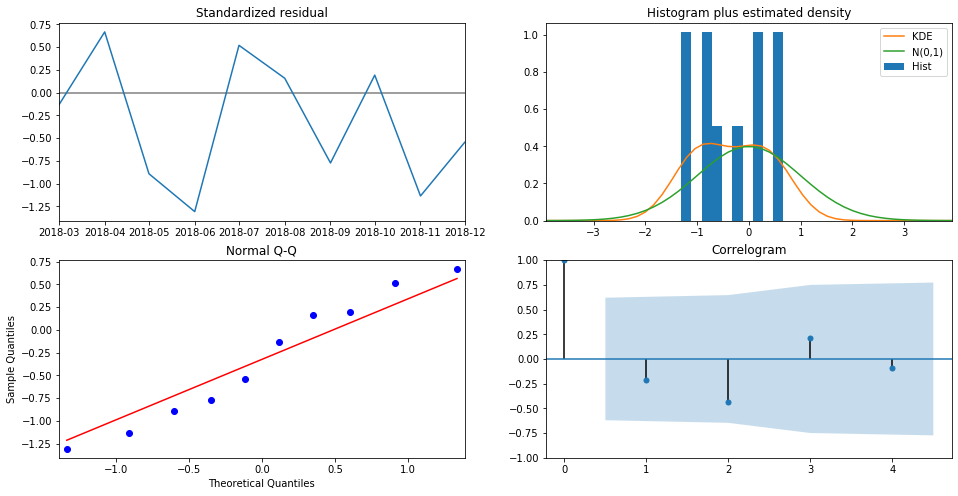

In [88]:

results.plot_diagnostics(lags=4,figsize=(16, 8))
plt.show()

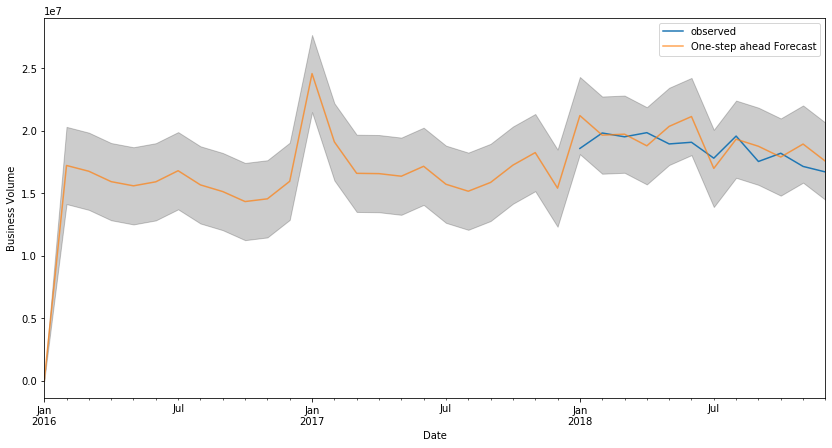

In [90]:
#Validating forecasts
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Business Volume')
plt.legend()
plt.show()

In [92]:
import numpy as np
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 5433207748476.31
The Root Mean Squared Error of our forecasts is 2330924.23


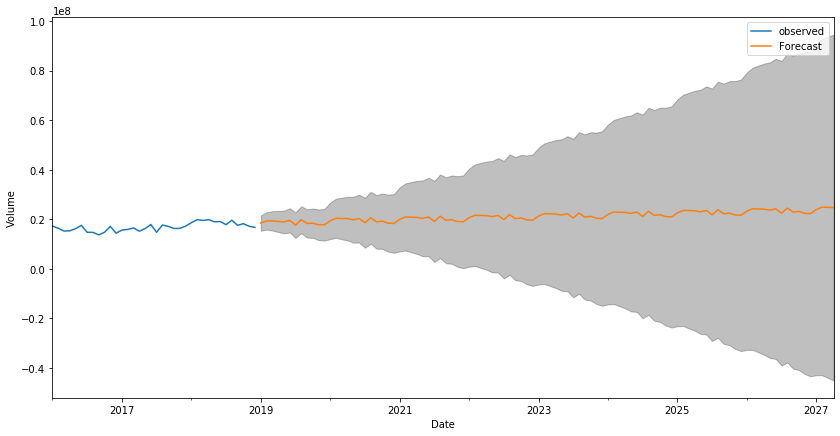

In [93]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
plt.legend()
plt.show()